In [1]:
import os
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing 

In [2]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_raw = pd.read_csv('Automobile_data.csv') #, low_memory=False

In [5]:
df_raw.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df_raw[:5]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
df_raw = df_raw.replace('?', np.nan)

In [8]:
# Extract all string-type columns
col_string = []
for col in df_raw:
    if df_raw[col].dtypes == 'object':
        col_string.append(col)
print("String type columns: ", col_string)
    

String type columns:  ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'num-of-cylinders', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [9]:
# convert following columns to continuous variables based on data description
cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]

for i in cols:
    df_raw[i] = pd.to_numeric(df_raw[i]) #, errors='raise'

In [10]:
df_raw['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [11]:
df_raw['drive-wheels'].replace({'4wd': 'fwd'}, inplace=True)
df_raw['num-of-cylinders'].replace({'four': 4, 'six':6, 'five': 5, 'three': 3, 'twelve':12, 'two':2, 'eight':8}, inplace=True)

In [12]:
le_cols = ['fuel-type', 'aspiration','num-of-doors', 'drive-wheels', 'engine-location']

In [13]:
le = preprocessing.LabelEncoder()

for i in le_cols:
    df_raw[i] = le.fit_transform(df_raw[i])

In [14]:
df_raw.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type              int32
aspiration             int32
num-of-doors           int32
body-style            object
drive-wheels           int32
engine-location        int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
num-of-cylinders       int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [15]:
df_raw = pd.get_dummies(df_raw, columns=['make', 'body-style'])

In [16]:
df_raw.fillna(df_raw.median(), inplace=True)

In [17]:
df_raw.isna().sum()

symboling                 0
normalized-losses         0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot         

In [18]:
df_raw[:3]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115.0,1,0,1,1,0,88.6,168.8,64.1,...,False,False,False,False,False,True,False,False,False,False
1,3,115.0,1,0,1,1,0,88.6,168.8,64.1,...,False,False,False,False,False,True,False,False,False,False
2,1,115.0,1,0,1,1,0,94.5,171.2,65.5,...,False,False,False,False,False,False,False,True,False,False


## Predict continuous variable - price

In [20]:
X = df_raw.drop('price', axis=1)
y = df_raw['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 48), (41, 48), (164,), (41,))

In [21]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [22]:
def rmse(preds, actuals):
    return math.sqrt(((preds - actuals)**2).mean())

In [23]:
[rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val), m.score(X_train, y_train), m.score(X_val, y_val)]

[1061.6915465664958, 2636.807098853273, 0.9826357464701306, 0.8512275355828077]

## Predict categorical variable - symboling

In [25]:
X = df_raw.drop('symboling', axis=1)
y = df_raw['symboling']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((164, 48), (41, 48), (164,), (41,))

In [26]:
m = RandomForestClassifier(n_jobs = -1)
m.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [27]:
print(m.score(X_train, y_train))
print(m.score(X_val, y_val))

1.0
0.7804878048780488


## Parameter tuning

In [29]:
# Tune three parameters: n_estimators, min_samples_leaf, and max_features
# This may take a while to run

numOfestimators = [1,5,10,15,20,25,30]
numOfleafs = [1, 3, 5, 10, 25]
numOffeatures = np.arange(0.1, 1.1, 0.1)
best_result = []
for NumOfEstimator in numOfestimators:
    for NumOfLeaf in numOfleafs:
        for NumOfFeature in numOffeatures:
            result = [NumOfEstimator, NumOfLeaf, NumOfFeature]
            m = RandomForestClassifier(n_jobs=-1, 
                                       n_estimators=NumOfEstimator, 
                                       min_samples_leaf=NumOfLeaf, 
                                       max_features=NumOfFeature)
            m.fit(X_train, y_train)
            result.append(m.score(X_train, y_train))
            result.append(m.score(X_val, y_val))
            if len(best_result) == 0:
                best_result = result
            elif best_result[4] < result[4]:
                print(result)
                best_result = result
print("The best result is", best_result)

[1, 1, 0.5, 0.9207317073170732, 0.7317073170731707]
[5, 1, 0.2, 0.9695121951219512, 0.7560975609756098]
[5, 1, 0.30000000000000004, 0.975609756097561, 0.7804878048780488]
[5, 1, 0.6, 1.0, 0.8292682926829268]
The best result is [5, 1, 0.6, 1.0, 0.8292682926829268]


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [1,5,10,15,20,25,30], 'max_features': [ 0.3, 0.4, 0.6, 0.8, 1. ], 
 'min_samples_leaf': [1, 3, 5, 10, 25], 'bootstrap': [True, False]}
]

forest = RandomForestClassifier(n_jobs=-1)

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [0.3, 0.4, 0.6, 0.8, 1.0],
                          'min_samples_leaf': [1, 3, 5, 10, 25],
                          'n_estimators': [1, 5, 10, 15, 20, 25, 30]}],
             scoring='neg_mean_squared_error')

In [31]:
cvres = grid_search_forest.cv_results_

# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [32]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=0.6, n_estimators=25,
                       n_jobs=-1)

In [33]:
#RMSE
from sklearn.metrics import mean_squared_error
grid_best=grid_search_forest.best_estimator_.predict(X_train)
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.0


In [83]:
print('The best model from the grid search has a RMSE of', round(grid_mse, 2))

The best model from the grid search has a RMSE of 0.0


In [34]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [35]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=99, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=99, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
cvres2 = rf_random.cv_results_
# for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
#     print(np.sqrt(-mean_score), params)

In [37]:
# best random model 
rf_random.best_estimator_

RandomForestClassifier(max_depth=23, min_samples_split=5, n_estimators=65,
                       n_jobs=-1)

In [38]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 65,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [39]:
#this is the RMSE
random_best= rf_random.best_estimator_.predict(X_train)
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.22


In [40]:
#Feature importance

# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                 feature
0     0.082217              wheel-base
1     0.079735                  height
2     0.071936       normalized-losses
3     0.067149                   width
4     0.059508                   price
5     0.059207                  length
6     0.055300             curb-weight
7     0.053593            num-of-doors
8     0.053436             highway-mpg
9     0.047119                    bore
10    0.038026             engine-size
11    0.037216                  stroke
12    0.031787                peak-rpm
13    0.030354              horsepower
14    0.026170       compression-ratio
15    0.024095                city-mpg
16    0.017199              make_volvo
17    0.016381        body-style_sedan
18    0.015786    body-style_hatchback
19    0.014391         make_volkswagen
20    0.011895             make_toyota
21    0.011442               make_audi
22    0.010448            drive-wheels
23    0.009644             make_peugot
24    0.009528        bod

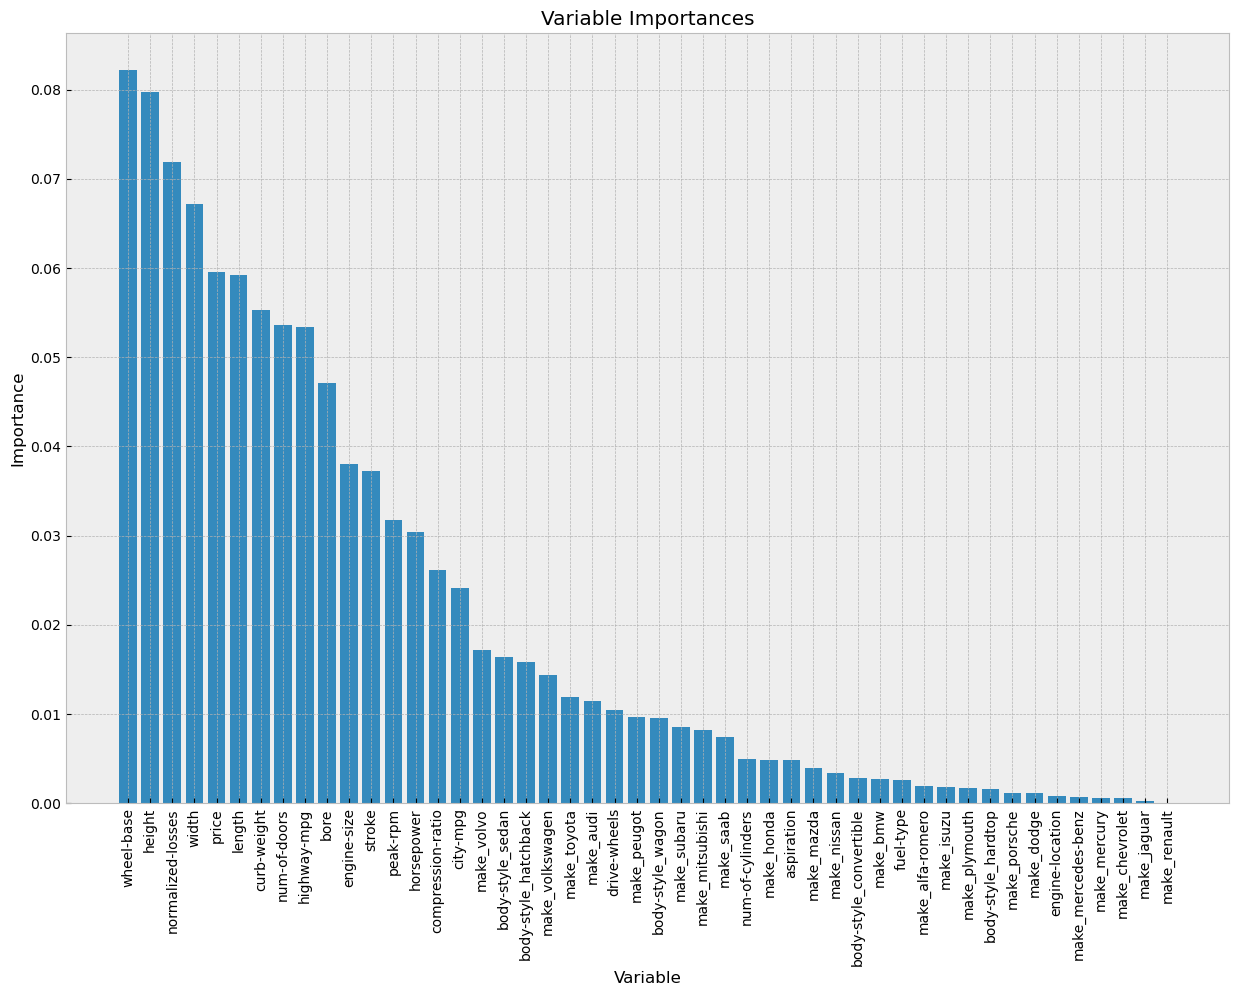

In [41]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [42]:
#Evaluate best model on the test set

final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_val)
final_mse = mean_squared_error(y_val, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.75
